# Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Get data from MicrobeJ files and restructure it

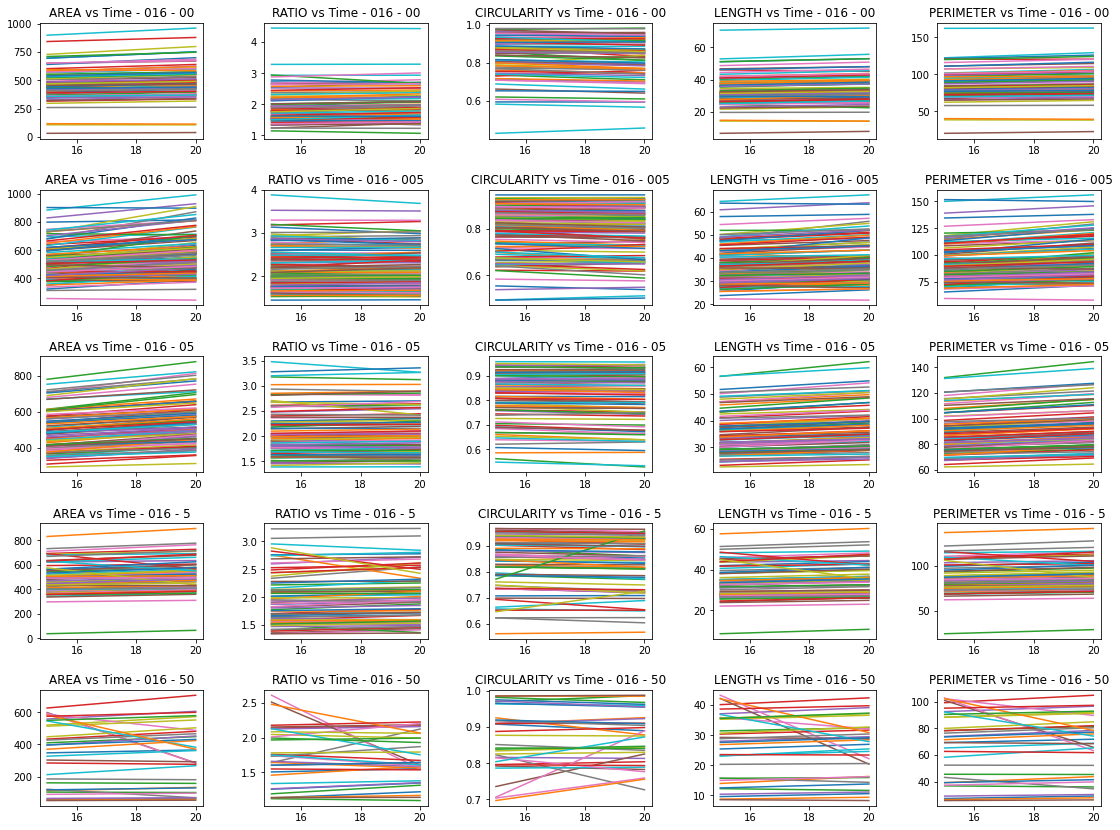

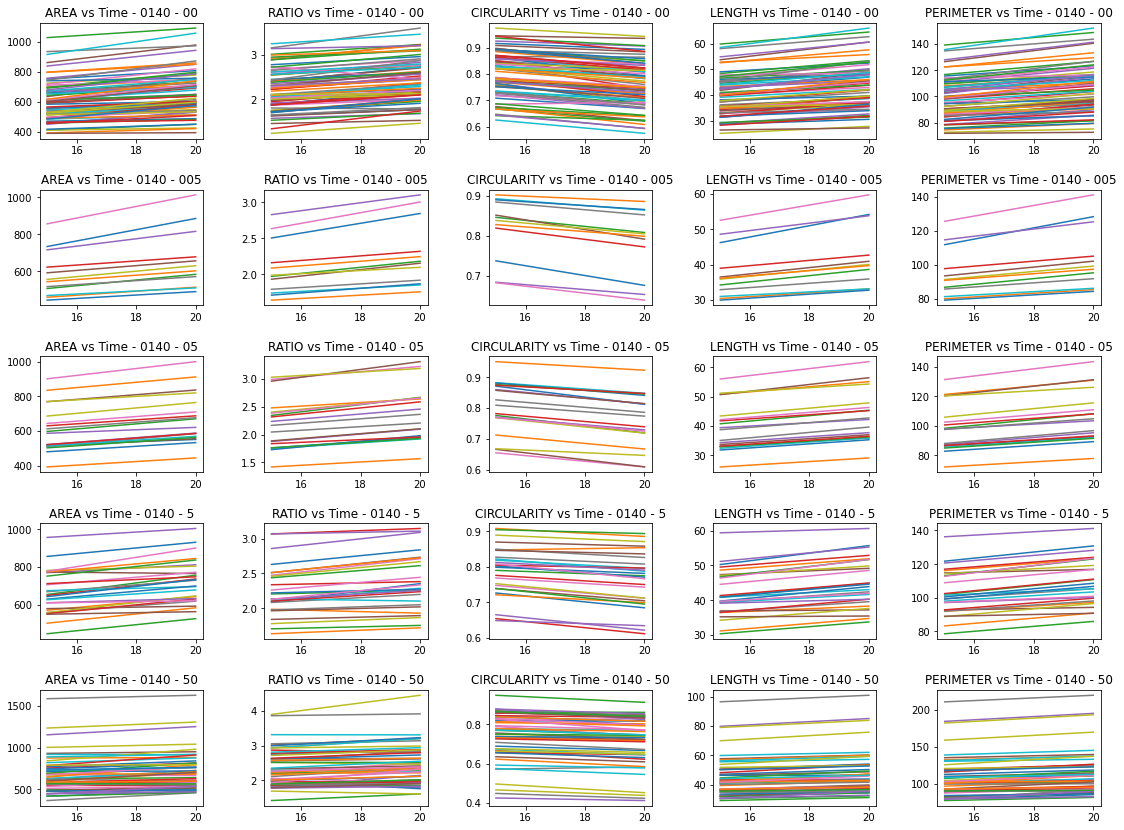

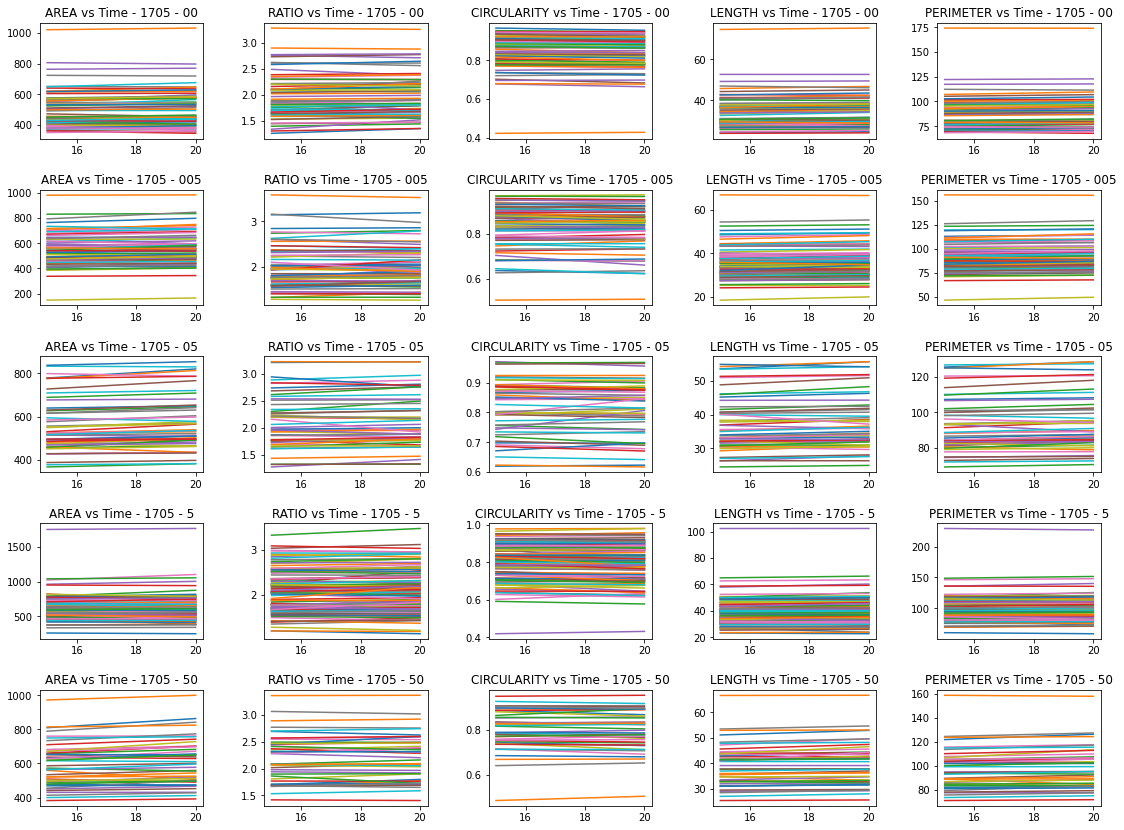

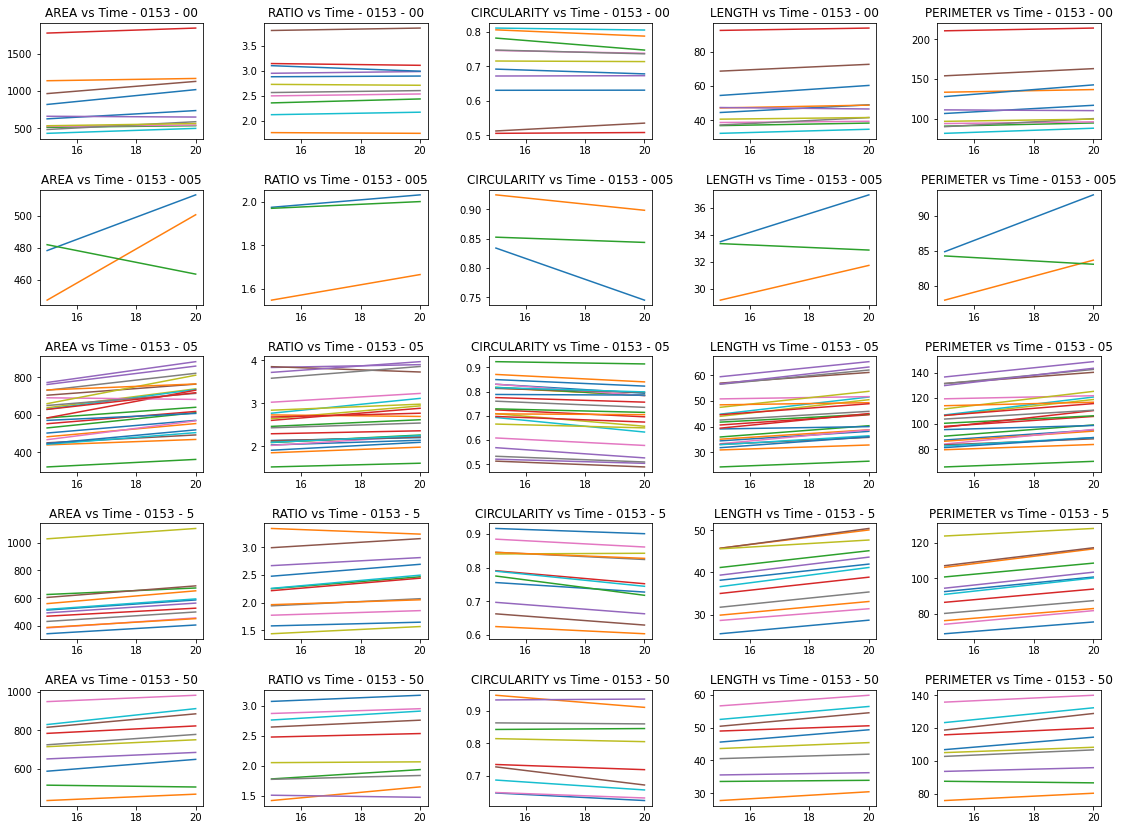

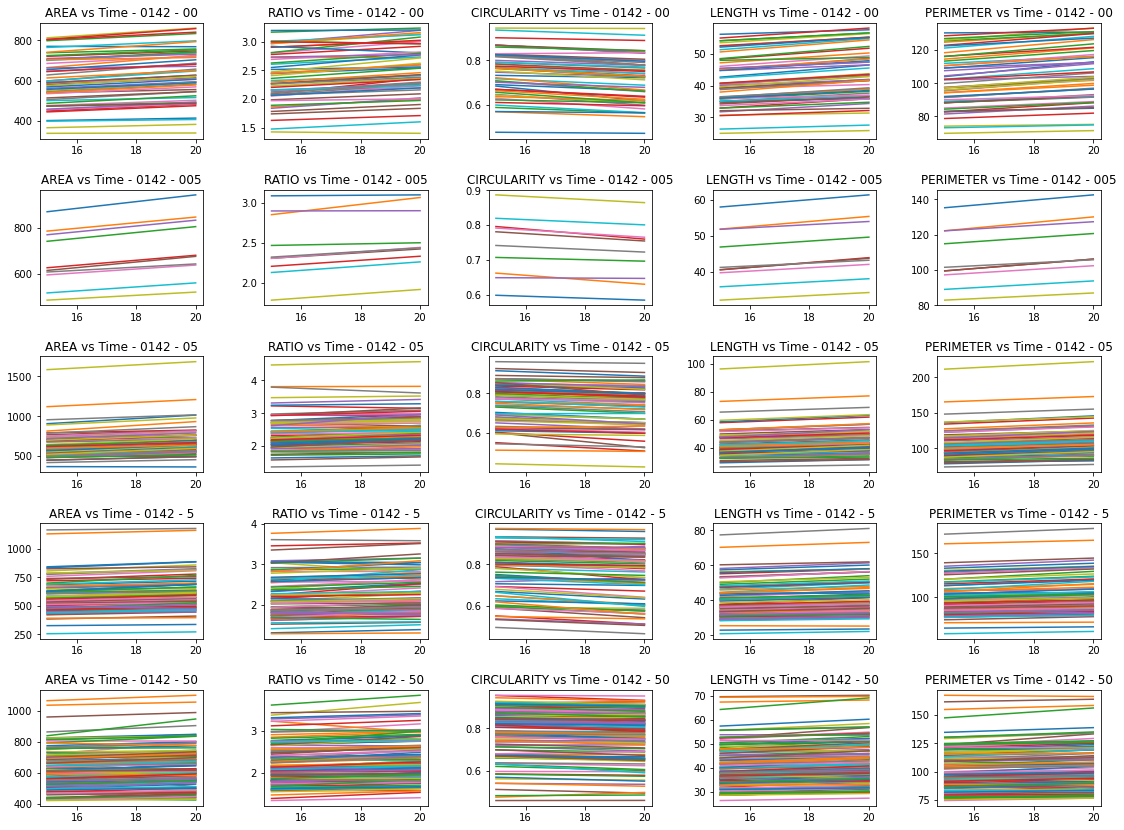

In [4]:
# Define stack variables --- THESE ARE THE VARIABLES THAT COULD CHANGE FROM STACK TO STACK 
positions_count = 8
starting_time = 15
t_interval = 5
t = starting_time

n_total = 0

# Use values defined above to create time array 
time = []
for i in range(positions_count):
    time.append(t)
    t = t + t_interval 

# Add/Remove strings from array 
strings = ['016', '0140', '1705', '0153', '0142']

# Define concentrations 
concentrations = ['00', '005', '05', '5', '50']

# Create empty array that will save all rates 
rates_all = []
rates_all_s = []

# Define features that will be included during calculation 
features = ['area', 'aspectRatio', 'circularity', 'length', 'perimeter']
features_updated = ['AREA', 'RATIO', 'CIRCULARITY', 'LENGTH', 'PERIMETER']

# Create for loop (later turn in into external function)


for string in range(len(strings)): # goes through strings (files)
    
    # Create empty string for individual string rates that will be appended to rates_all
    concentrations_rates = []
    concentrations_rates_s = []
    
    fig, axs = plt.subplots(5, 5, figsize=(16, 12))
    fig.tight_layout(pad=3.0)
    
    for concentration in range(len(concentrations)): # goes through concentrations in each string (files)
        data = pd.read_csv('KP_{}/KP_{}_{}.csv'.format(strings[string], strings[string], concentrations[concentration]))

        for feature_number in range(len(features)):
            data = data.rename(columns={'SHAPE.{}'.format(features[feature_number]) : '{}'.format(features_updated[feature_number])})

        area = data.AREA
        ratio = data.RATIO
        circularity = data.CIRCULARITY
        length = data.LENGTH
        perimeter = data.PERIMETER

        features_data = [area, ratio, circularity, length, perimeter]
        features_rates = []
        features_rates_s = []

        # Plot cells 
        total_rows = len(data)
        total_cells = total_rows / positions_count  

        i = 0 # row counter 
        n = 1 # cell counter 

        for feature_data_number in range(len(features_data)):

            rates = []
            rates_s = []

            i = 0 # row counter 
            n = 1 # cell counter

            for a in range(int(total_cells)): 
                x = []
                y = []
                for t in range(positions_count):
                    x.append(time[t])
                    y.append(features_data[feature_data_number][i])
                    i = i + 1
                n = n + 1;

                # Change range for shorter times (15-1, 20-2, 25-3, 30-4, 35-5, 40-6, 45-7, 50-8)
                xs = x[0:2]
                ys = y[0:2]

                log_x = np.log(x)
                log_y = np.log(y)

                log_xs = np.log(xs)
                log_ys = np.log(ys)

                rate, coefficient = np.polyfit(x, log_y, 1)
                n_total = n_total + 1
                rates.append(rate)

                rate_s, coefficient_s = np.polyfit(xs, log_ys, 1)
                rates_s.append(rate_s)
                
                axs[concentration, feature_data_number].plot(xs, ys)
                axs[concentration, feature_data_number].set_title('{} vs Time - {} - {}'.format(features_updated[feature_data_number], strings[string], concentrations[concentration]))


            features_rates.append(rates)
            features_rates_s.append(rates_s)

        concentrations_rates.append(features_rates)
        concentrations_rates_s.append(features_rates_s)
        
    rates_all.append(concentrations_rates)
    rates_all_s.append(concentrations_rates_s)
    
    #plt.show()

# Generate data for Pandas Dataframe

In [4]:
df_data = []

concentrations = ['00', '.005', '.05', '.5', '50']
growing = 1
not_growing = 0

for i in range(len(rates_all_s)):

    for concentration_number in range(len(concentrations)):
        c = concentration_number
        
        
        
        rates = rates_all_s[i][concentration_number]
    
        area_rates = rates[0]
        aspectRatio_rates = rates[1]
        circularity_rates = rates[2]
        length_rates = rates[3]
        perimeter_rates = rates[4]
        concentration = concentrations[concentration_number]
        string = strings[i]
        
        if i == 0:
            if c == 2 or c == 3 or c == 4:
                for p in range(len(circularity_rates)):
                    df_list = []
            
            
                    df_list.append(area_rates[p])
                    df_list.append(aspectRatio_rates[p])
                    df_list.append(circularity_rates[p])
                    df_list.append(length_rates[p])
                    df_list.append(perimeter_rates[p])
                    df_list.append(string)
                    df_list.append(concentration)
                    df_list.append(not_growing)
                    
                    df_data.append(df_list)
            else:
                for p in range(len(circularity_rates)):
                    df_list = []
            
            
                    df_list.append(area_rates[p])
                    df_list.append(aspectRatio_rates[p])
                    df_list.append(circularity_rates[p])
                    df_list.append(length_rates[p])
                    df_list.append(perimeter_rates[p])
                    df_list.append(string)
                    df_list.append(concentration)
                    df_list.append(growing)
                    
                    df_data.append(df_list)
        elif i == 3:
            for p in range(len(circularity_rates)):
                df_list = []
            
            
                df_list.append(area_rates[p])
                df_list.append(aspectRatio_rates[p])
                df_list.append(circularity_rates[p])
                df_list.append(length_rates[p])
                df_list.append(perimeter_rates[p])
                df_list.append(string)
                df_list.append(concentration)
                df_list.append(growing)
                    
                df_data.append(df_list)
        else:
            if c == 4:
                for p in range(len(circularity_rates)):
                    df_list = []
            
            
                    df_list.append(area_rates[p])
                    df_list.append(aspectRatio_rates[p])
                    df_list.append(circularity_rates[p])
                    df_list.append(length_rates[p])
                    df_list.append(perimeter_rates[p])
                    df_list.append(string)
                    df_list.append(concentration)
                    df_list.append(not_growing)
                    
                    df_data.append(df_list)
            else:
                for p in range(len(circularity_rates)):
                    df_list = []
            
            
                    df_list.append(area_rates[p])
                    df_list.append(aspectRatio_rates[p])
                    df_list.append(circularity_rates[p])
                    df_list.append(length_rates[p])
                    df_list.append(perimeter_rates[p])
                    df_list.append(string)
                    df_list.append(concentration)
                    df_list.append(growing)
                    
                    df_data.append(df_list)

# Create Dataframe

In [5]:
columns = ['AREA', 'RATIO', 'CIRCULARITY', 'LENGTH', 'PERIMETER', 'STRING', 'CONCENTRATION', 'GROWTH']
index = list(range(0, 1338))
df = pd.DataFrame(df_data, index, columns)

df

,AREA,RATIO,CIRCULARITY,LENGTH,PERIMETER,STRING,CONCENTRATION,GROWTH
0,0.004812,0.004346,-0.007864,0.007087,0.006338,016,00,1
1,0.009479,0.000218,-0.006588,0.008193,0.008033,016,00,1
2,0.008181,0.010873,-0.006254,0.009161,0.007218,016,00,1
3,0.012376,0.011386,-0.006329,0.010944,0.009353,016,00,1
4,0.008357,0.000822,-0.000596,0.005009,0.004476,016,00,1
...,...,...,...,...,...,...,...,...
1333,0.007230,0.003263,-0.001796,0.004656,0.004513,0142,50,0
1334,0.008641,-0.001582,0.000483,0.004287,0.004079,0142,50,0
1335,0.006322,0.000359,-0.000242,0.004035,0.003282,0142,50,0
1336,0.005537,-0.000665,-0.000663,0.003749,0.003100,0142,50,0


In [7]:
df.to_csv('RATES/method0/rates_normal_50min.csv')

# Check data

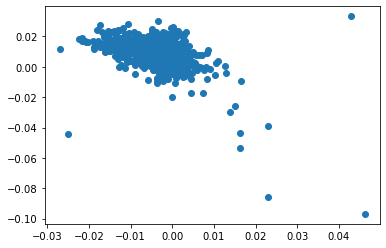

In [7]:
# Check - circularity, perimeter
x = df['CIRCULARITY']
y = df['PERIMETER']

plt.scatter(x, y)
plt.show()

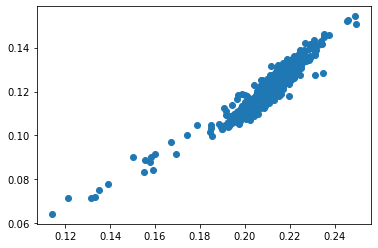

In [37]:
# Check - area, length
a = df['AREA']
l = df['LENGTH']

plt.scatter(a, l)
plt.show()

# Divide into Grow and Not Grow (Count)

In [11]:
growth = np.array(df.GROWTH)

grow_total = 0
notgrow_total = 0

for g in growth:
    if g == 1:
        grow_total += 1
    else:
        notgrow_total += 1

print(grow_total, notgrow_total)  

919 419


# Create Grow and Not Grow group for each feature

In [12]:
df_grow = df.loc[df.GROWTH == 1 ]
df_notgrow = df.loc[df.GROWTH == 0]

In [13]:
df_grow_016 = df_grow.loc[df_grow.STRING == '016']
df_grow_016_00 = df_grow_016.loc[df_grow_016.CONCENTRATION == '00']
df_grow_016_00

,AREA,RATIO,CIRCULARITY,LENGTH,PERIMETER,STRING,CONCENTRATION,GROWTH
0,0.004812,0.004346,-0.007864,0.007087,0.006338,016,00,1
1,0.009479,0.000218,-0.006588,0.008193,0.008033,016,00,1
2,0.008181,0.010873,-0.006254,0.009161,0.007218,016,00,1
3,0.012376,0.011386,-0.006329,0.010944,0.009353,016,00,1
4,0.008357,0.000822,-0.000596,0.005009,0.004476,016,00,1
...,...,...,...,...,...,...,...,...
77,0.009142,0.006944,-0.004019,0.008582,0.006580,016,00,1
78,0.013547,0.009350,-0.005439,0.011050,0.009493,016,00,1
79,0.010231,0.004071,-0.001416,0.007319,0.005823,016,00,1
80,0.009208,0.004542,-0.001498,0.006233,0.005353,016,00,1


In [14]:
d = [df_grow_016_00]
np.array(d[0].AREA)

array([0.0048118 , 0.00947889, 0.00818141, 0.01237584, 0.00835679,
       0.0080781 , 0.0119622 , 0.01075857, 0.01017498, 0.00866273,
       0.01040486, 0.00735239, 0.00836229, 0.00982976, 0.01109553,
       0.00913137, 0.00945023, 0.00780043, 0.01136036, 0.01145322,
       0.00980605, 0.01110954, 0.00960857, 0.01055165, 0.01026466,
       0.00928311, 0.01227761, 0.01148076, 0.0084411 , 0.00753701,
       0.01012425, 0.00930274, 0.01139803, 0.00955855, 0.00950964,
       0.00839108, 0.01175748, 0.00937692, 0.01040095, 0.01038259,
       0.01254466, 0.01027361, 0.00973909, 0.00977985, 0.00891257,
       0.01190657, 0.00952375, 0.01088011, 0.00949015, 0.0092415 ,
       0.01146803, 0.01077978, 0.0011085 , 0.01151986, 0.0133018 ,
       0.01034631, 0.00943089, 0.01168405, 0.01332654, 0.00981042,
       0.0099122 , 0.0089184 , 0.01072085, 0.00907538, 0.00996589,
       0.00643128, 0.00871972, 0.001602  , 0.00162725, 0.01013178,
       0.00953425, 0.00182282, 0.00823754, 0.01032078, 0.00982

In [17]:
strings = ['016', '0140', '1705', '0153', '0142']

strings_dfs_grow = []
strings_dfs_notgrow = []

for i in range(5):
    
    df_str_grow = df_grow.loc[df_grow.STRING == strings[i]]
    df_str_notgrow = df_notgrow.loc[df_notgrow.STRING == strings[i]]
    
    strings_dfs_grow.append(df_str_grow)
    strings_dfs_notgrow.append(df_str_notgrow)

In [18]:
concentrations = ['00', '005', '05', '5', '50']

for string in strings_dfs_grow:
    c1 = string.loc[string.CONCENTRATION == concentrations[0]]
    c2 = string.loc[string.CONCENTRATION == concentrations[1]]
    c3 = string.loc[string.CONCENTRATION == concentrations[2]]
    c4 = string.loc[string.CONCENTRATION == concentrations[3]]
    c5 = string.loc[string.CONCENTRATION == concentrations[4]]
    
      

In [19]:
import random 

index_list = [*range(0, 82, 1)]

random_choice = random.choice(index_list)
print(random_choice)

current_row = df_grow_016_00.iloc[random_choice]
print(current_row)

75
AREA             0.009168
RATIO            0.008218
CIRCULARITY     -0.005658
LENGTH           0.008927
PERIMETER        0.007413
STRING                016
CONCENTRATION          00
GROWTH                  1
Name: 75, dtype: object


In [20]:
import random 

ab = [0,1,2,3,4,5]

counters_l = [0] * 6
complete_l = []

while len(complete_l) < 1:
    arr = []
    var1 = random.choice(ab)
    var2 = random.choice(ab)
    if var1 != var2:
        var3 = random.choice(ab)
        if (var1 != var3) and (var2 != var3):
            arr.append(var1)
            arr.append(var2)
            arr.append(var3)
        
    complete_l.append(arr)
            
print(complete_l)

[[]]


In [21]:
import random 

ab = [0,1,2,3,4,5]

counters_l = [0] * 6
complete_l = []

while len(complete_l) < len(ab):
    var1 = random.choice(ab)
    var2 = random.choice(ab)
    if var1 != var2:
        var3 = random.choice(ab)
        if (var1 != var3) and (var2 != var3):
            if (counters_l[var1] < 3) and (counters_l[var2] < 3) and (counters_l[var3] < 3):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
                
                complete_l.append(arr)
            
print(complete_l)
print(counters_l)

KeyboardInterrupt: 

In [ ]:
import random 

ab = [0,1,2,3,4,5]

counters_l = [0] * 6
complete_l = []

while len(complete_l) < len(ab):
    var1 = random.choice(ab)
    var2 = random.choice(ab)
    if var1 != var2:
        if (counters_l[var1] < 3) and (counters_l[var2] < 3):
            var3 = random.choice(ab)
            if (var1 != var3) and (var2 != var3):
                if (counters_l[var1] < 3) and (counters_l[var2] < 3) and (counters_l[var3] < 3):
                    arr = []
                
                    counters_l[var1] += 1
                    counters_l[var2] += 1
                    counters_l[var3] += 1
                
                    arr.append(var1)
                    arr.append(var2)
                    arr.append(var3)
                
                    complete_l.append(arr)
            
print(complete_l)
print(counters_l)

In [ ]:
import random 

ab = [0,1,2,3,4,5]

counters_l = [0] * 6
complete_l = []

goal_sum_counters = len(ab) * 3
sum_counters = sum(counters_l)

while len(complete_l) < 2:
    ab_i = [0, 1, 2, 3, 4, 5]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 1):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 1):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 1):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
                
while len(complete_l) < 4:
    ab_i = [0, 1, 2, 3, 4, 5]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 2):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 2):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 2):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
                
while len(complete_l) < 6:
    ab_i = [0, 1, 2, 3, 4, 5]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 3):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 3):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 3):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
            
print(complete_l)
print(counters_l)
sum_counters = sum(counters_l)
print(sum_counters)

In [ ]:
import random 

ab = [0,1,2,3,4,5]

counters_l = [0] * len(ab)
complete_l = []

sum_counters = sum(counters_l)

while sum_counters < (len(ab) * 1):
    ab_i = [0, 1, 2, 3, 4, 5]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 1):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 1):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 1):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
    
    sum_counters = sum(counters_l)
                
while sum_counters < (len(ab) * 2):
    ab_i = [0, 1, 2, 3, 4, 5]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 2):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 2):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 2):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
                
    sum_counters = sum(counters_l)
                
while sum_counters < (len(ab) * 3):
    ab_i = [0, 1, 2, 3, 4, 5]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 3):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 3):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 3):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
                
    sum_counters = sum(counters_l)
            
print(complete_l)
print(counters_l)

In [91]:
import random 

ab = [*range(0, 6, 1)]

counters_l = [0] * len(ab)
complete_l = []

sum_counters = sum(counters_l)

while sum_counters < (len(ab) * 1):
    ab_i = [*range(0, 6, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 1):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 1):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 1):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
    
    sum_counters = sum(counters_l)
                
while sum_counters < (len(ab) * 2):
    ab_i = [*range(0, 6, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 2):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 2):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 2):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
                
    sum_counters = sum(counters_l)
                
while sum_counters < (len(ab) * 3):
    ab_i = [*range(0, 6, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 3):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 3):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 3):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
                
    sum_counters = sum(counters_l)
            
print(complete_l)
print(counters_l)

[[5, 4, 2], [1, 3, 0], [0, 1, 3], [5, 2, 4], [3, 4, 2], [1, 5, 0]]
[3, 3, 3, 3, 3, 3]


In [25]:
import random 

l_selected = 10

ab = [*range(0, l_selected, 1)]

counters_l = [0] * len(ab)
complete_l = []

sum_counters = sum(counters_l)

while sum_counters < ((len(ab) * 1)-2):
    ab_i = [*range(0, l_selected, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 1):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 1):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 1):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
    
    sum_counters = sum(counters_l)
    
                
while sum_counters < ((len(ab) * 2)-2):
    ab_i = [*range(0, l_selected, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 2):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 2):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 2):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
                
    sum_counters = sum(counters_l)
    
                
while sum_counters < (len(ab) * 3):
    ab_i = [*range(0, l_selected, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 3):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 3):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 3):
                arr = []
                
                counters_l[var1] += 1
                counters_l[var2] += 1
                counters_l[var3] += 1
                
                arr.append(var1)
                arr.append(var2)
                arr.append(var3)
            
                complete_l.append(arr)
                
    sum_counters = sum(counters_l)
            
print(complete_l)
print(counters_l)

[[4, 7, 8], [2, 9, 3], [0, 5, 6], [3, 8, 2], [1, 9, 5], [1, 7, 6], [9, 5, 2], [1, 0, 3], [6, 4, 8], [4, 0, 7]]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [19]:
df_grow_016_00

,AREA,RATIO,CIRCULARITY,LENGTH,PERIMETER,STRING,CONCENTRATION,GROWTH
0,0.004812,0.004346,-0.007864,0.007087,0.006338,016,00,1
1,0.009479,0.000218,-0.006588,0.008193,0.008033,016,00,1
2,0.008181,0.010873,-0.006254,0.009161,0.007218,016,00,1
3,0.012376,0.011386,-0.006329,0.010944,0.009353,016,00,1
4,0.008357,0.000822,-0.000596,0.005009,0.004476,016,00,1
...,...,...,...,...,...,...,...,...
77,0.009142,0.006944,-0.004019,0.008582,0.006580,016,00,1
78,0.013547,0.009350,-0.005439,0.011050,0.009493,016,00,1
79,0.010231,0.004071,-0.001416,0.007319,0.005823,016,00,1
80,0.009208,0.004542,-0.001498,0.006233,0.005353,016,00,1


In [35]:
l_averaged_algo = []

for i in range(len(complete_l)):
    algo_l = []
    [c1, c2, c3] = complete_l[i]
    
    r1 = df_grow_016_00.iloc[c1]
    r2 = df_grow_016_00.iloc[c2]
    r3 = df_grow_016_00.iloc[c3]
    
    area = (r1.AREA + r2.AREA + r3.AREA) / 3
    ratio = (r1.RATIO + r2.RATIO + r3.RATIO) / 3
    circularity = (r1.CIRCULARITY + r2.CIRCULARITY + r3.CIRCULARITY) / 3
    length = (r1.LENGTH + r2.LENGTH + r3.LENGTH) / 3
    perimeter = (r1.PERIMETER + r2.PERIMETER + r3.PERIMETER) / 3
    
    algo_l.append(area)
    algo_l.append(ratio)
    algo_l.append(circularity)
    algo_l.append(length)
    algo_l.append(perimeter)
    
    l_averaged_algo.append(algo_l)

In [36]:
l_averaged_algo

[[0.009737226846384747,
  0.00566942546585759,
  -0.007240066148981082,
  0.009445961392454379,
  0.008488646637171863],
 [0.010435146744380161,
  -0.0021795259518022224,
  -0.005928363074386337,
  0.008462083544854589,
  0.008181755077693125],
 [0.009968504447671065,
  0.005464416487787778,
  -0.003934302373938065,
  0.008218881032814457,
  0.006951402884359499],
 [0.008890285763390402,
  0.0036896275344619578,
  -0.0013309184400140794,
  0.0061490871298553575,
  0.005110602941128623],
 [0.009323522794785136,
  0.003929457633600096,
  -0.0041957410257242546,
  0.007152685336460178,
  0.006759631575007914],
 [0.010771992067397906,
  0.005123336489968474,
  -0.00345642432464468,
  0.008007896913469162,
  0.0071142074318465255],
 [0.009311307412145114,
  2.4276098903635152e-05,
  -0.003930213574295633,
  0.007298668794210068,
  0.006620760155726196],
 [0.009908941008612858,
  0.0028448554280185822,
  -0.002918671782402687,
  0.007533203832023411,
  0.006413805236528344],
 [0.009523439020

In [37]:
columns = ['AREA', 'RATIO', 'CIRCULARITY', 'LENGTH', 'PERIMETER']
index = list(range(0, 82))
df_algo = pd.DataFrame(l_averaged_algo, index, columns)

df_algo

,AREA,RATIO,CIRCULARITY,LENGTH,PERIMETER
0,0.009737,0.005669,-0.007240,0.009446,0.008489
1,0.010435,-0.002180,-0.005928,0.008462,0.008182
2,0.009969,0.005464,-0.003934,0.008219,0.006951
3,0.008890,0.003690,-0.001331,0.006149,0.005111
4,0.009324,0.003929,-0.004196,0.007153,0.006760
...,...,...,...,...,...
77,0.009289,-0.000911,-0.002068,0.006198,0.005678
78,0.010754,0.002261,-0.005324,0.009010,0.008039
79,0.009054,0.006230,-0.003034,0.007970,0.006044
80,0.010756,0.002478,-0.003073,0.007664,0.006915


In [31]:
import random 

l_selected = 10

ab = [*range(0, l_selected, 1)]

counters_l = [0] * len(ab)
complete_l = []

sum_counters = sum(counters_l)

while sum_counters < ((len(ab) * 1)-4):
    ab_i = [*range(0, l_selected, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 1):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 1):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 1):
                ab_i.remove(var3)
                var4 = random.choice(ab_i)
                
                if (counters_l[var4] < 1):
                    ab_i.remove(var4)
                    var5 = random.choice(ab_i)
                    
                    if (counters_l[var5] < 1):
                        arr = []
                
                        counters_l[var1] += 1
                        counters_l[var2] += 1
                        counters_l[var3] += 1
                        counters_l[var4] += 1
                        counters_l[var5] += 1
                
                        arr.append(var1)
                        arr.append(var2)
                        arr.append(var3)
                        arr.append(var4)
                        arr.append(var5)
            
                        complete_l.append(arr)
    
    sum_counters = sum(counters_l)
    
                
while sum_counters < ((len(ab) * 2)-4):
    ab_i = [*range(0, l_selected, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 2):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 2):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 2):
                ab_i.remove(var3)
                var4 = random.choice(ab_i)
                
                if (counters_l[var4] < 2):
                    ab_i.remove(var4)
                    var5 = random.choice(ab_i)
                    
                    if (counters_l[var5] < 2):
                        arr = []
                
                        counters_l[var1] += 1
                        counters_l[var2] += 1
                        counters_l[var3] += 1
                        counters_l[var4] += 1
                        counters_l[var5] += 1
                
                        arr.append(var1)
                        arr.append(var2)
                        arr.append(var3)
                        arr.append(var4)
                        arr.append(var5)
            
                        complete_l.append(arr)
    
    sum_counters = sum(counters_l)
    
                
while sum_counters < ((len(ab) * 3)-4):
    ab_i = [*range(0, l_selected, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 3):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 3):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 3):
                ab_i.remove(var3)
                var4 = random.choice(ab_i)
                
                if (counters_l[var4] < 3):
                    ab_i.remove(var4)
                    var5 = random.choice(ab_i)
                    
                    if (counters_l[var5] < 3):
                        arr = []
                
                        counters_l[var1] += 1
                        counters_l[var2] += 1
                        counters_l[var3] += 1
                        counters_l[var4] += 1
                        counters_l[var5] += 1
                
                        arr.append(var1)
                        arr.append(var2)
                        arr.append(var3)
                        arr.append(var4)
                        arr.append(var5)
            
                        complete_l.append(arr)
    
    sum_counters = sum(counters_l)
    
    
while sum_counters < ((len(ab) * 4)-4):
    ab_i = [*range(0, l_selected, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 4):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 4):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 4):
                ab_i.remove(var3)
                var4 = random.choice(ab_i)
                
                if (counters_l[var4] < 4):
                    ab_i.remove(var4)
                    var5 = random.choice(ab_i)
                    
                    if (counters_l[var5] < 4):
                        arr = []
                
                        counters_l[var1] += 1
                        counters_l[var2] += 1
                        counters_l[var3] += 1
                        counters_l[var4] += 1
                        counters_l[var5] += 1
                
                        arr.append(var1)
                        arr.append(var2)
                        arr.append(var3)
                        arr.append(var4)
                        arr.append(var5)
            
                        complete_l.append(arr)
    
    sum_counters = sum(counters_l)
    
    
while sum_counters < ((len(ab) * 5)):
    ab_i = [*range(0, l_selected, 1)]
    
    var1 = random.choice(ab_i)
    
    if (counters_l[var1] < 5):
        ab_i.remove(var1)
        var2 = random.choice(ab_i)
        
        if (counters_l[var2] < 5):
            ab_i.remove(var2)
            var3 = random.choice(ab_i)
            
            if (counters_l[var3] < 5):
                ab_i.remove(var3)
                var4 = random.choice(ab_i)
                
                if (counters_l[var4] < 5):
                    ab_i.remove(var4)
                    var5 = random.choice(ab_i)
                    
                    if (counters_l[var5] < 5):
                        arr = []
                
                        counters_l[var1] += 1
                        counters_l[var2] += 1
                        counters_l[var3] += 1
                        counters_l[var4] += 1
                        counters_l[var5] += 1
                
                        arr.append(var1)
                        arr.append(var2)
                        arr.append(var3)
                        arr.append(var4)
                        arr.append(var5)
            
                        complete_l.append(arr)
    
    sum_counters = sum(counters_l)
            
print(complete_l)
print(counters_l)

[[1, 3, 8, 6, 5], [9, 7, 4, 2, 0], [3, 8, 4, 6, 5], [9, 0, 7, 2, 1], [7, 6, 3, 1, 4], [5, 9, 8, 2, 0], [8, 6, 4, 5, 7], [9, 3, 1, 0, 2], [1, 2, 9, 3, 6], [4, 7, 8, 5, 0]]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [128]:
import random 

l_selected = 10
ab = [*range(0, l_selected, 1)]

group_avg_number = 5

counters_l = [0] * len(ab)
sum_counters = sum(counters_l)

complete_l = []

for number in range(l_selected):
    complete_l.append([])
    
for i in ab:
    
    while counters_l[i] < group_avg_number:
        ab_i = [*range(0, l_selected, 1)]
        
        group_number = random.choice(ab_i)
        group_array = complete_l[group_number]

        if (len(group_array) < group_avg_number) and not(i in group_array):
            group_array.append(i)
            counters_l[i] += 1
            #print(complete_l)
            #print(counters_l)
            
        ab_i.remove(group_number)

print(complete_l)
print(counters_l)

[[1, 3, 4, 6, 7], [0, 3, 7, 8, 9], [0, 1, 2, 4, 5], [2, 3, 4, 6, 8], [0, 5, 6, 8, 9], [0, 1, 2, 5, 6], [2, 3, 4, 5, 8], [1, 2, 7, 8, 9], [0, 1, 6, 7, 9], [3, 4, 5, 7, 9]]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [125]:
import random 

l_selected = 11
ab = [*range(0, l_selected, 1)]

group_avg_number = 5

counters_l = [0] * len(ab)
sum_counters = sum(counters_l)

complete_l = []

for number in range(l_selected):
    complete_l.append([])
    
avg_array = []
for an in range(group_avg_number):
    avg_array.append(an)
    
reversed_avg_array = list(reversed(avg_array))
 
for x in range(group_avg_number):
    requirement = group_avg_number - reversed_avg_array[x]
    for i in ab:
        while counters_l[i] < requirement:
            ab_i = [*range(0, l_selected, 1)]

            group_number = random.choice(ab_i)
            group_array = complete_l[group_number]

            if (len(group_array) < group_avg_number) and not(i in group_array):
                group_array.append(i)
                counters_l[i] += 1
                print(complete_l)
                print(counters_l)

            ab_i.remove(group_number)

print(complete_l)
print(counters_l)

[[0], [], [], [], [], [], [], [], [], [], []]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[0], [1], [], [], [], [], [], [], [], [], []]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[0, 2], [1], [], [], [], [], [], [], [], [], []]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[[0, 2], [1], [], [], [], [], [], [], [3], [], []]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[[0, 2], [1], [], [], [], [4], [], [], [3], [], []]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[[0, 2], [1], [], [], [], [4], [], [5], [3], [], []]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[[0, 2], [1, 6], [], [], [], [4], [], [5], [3], [], []]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[[0, 2], [1, 6], [], [], [], [4, 7], [], [5], [3], [], []]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[[0, 2], [1, 6], [], [], [], [4, 7, 8], [], [5], [3], [], []]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[[0, 2], [1, 6], [], [], [], [4, 7, 8], [], [5, 9], [3], [], []]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[[0, 2], [1, 6], [], [], [], [4, 7, 8, 10], [], [5, 9], [3], [], []]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0, 2], [1, 6],